# Topic discovery via k-means.

In [37]:
include("wikipedia_corpus.jl")
include("kmeans.jl")

using Main.Kmeans
using Plots

## The k-means algorithm

### > Randomly assign data points to centroids
### > Intialize centroids as mean of initially assigned data points
### > Repeat the following until convergence:
####   1)   Assign each vector to its nearest centroid (partition_data)
####   2) Update each centroid to be the average of its assigned vectors (update_centroids)
 
## Parameters:
####   data - The vectors to cluster, represented as an array of N n-vectors (N column vectors of length n).
####   k    - The number of clusters

## Returns:
####   centroids - The cluster centroids represented as an array of k column vectors of length n.
####   labels    - An array of N cluster assignments in the same order as data, so that the 1st data point's cluster assignment is labels[i]. The labels themselves index into the centroids list, i.e. centroids[labels[1]] returns the first data point's centroid.
####   losses    - An array containing the value of J at each iteration.

## Example Usage:
####   k = 5; N=200; n=10
####   generate a list of 200 random 10-vectors
####   data = [ rand(n) for x in 1:N ]
####   centroids, labels, losses = kmeans(data,k)
####   #print the vectors assigned to each cluster
####   for i=1:k
####     print(data[labels .== i])
####   end

#### It is important to realize that the KMeans algorithm is heuristic in nature, we can confirm that by the following set of experiments.

#### 1) For each of k = 2, k = 5, and k = 10 run k-means twice, and plot J (vertically) versus iteration (horizontally) for the two runs on the same plot. Create your plot by passing a vector containing the value of J at each iteration to PyPlot’s plot function.

Let us run kmeans algorithm twice for k=2 (2 Clusters) and store the J values in j_hist1 & j_hist2 for the first and second iteration respectively.

In [56]:
k = 2
centroids, labels, j_hist1 = kmeans(article_histograms, k)
println(j_hist1)

[0.928498295012624, 0.9148394494329143, 0.8993693053111257, 0.8916468586562468, 0.8915667693574278, 0.8915667693574278]


In [57]:
k = 2
centroids, labels, j_hist2 = kmeans(article_histograms, k)
println(j_hist2)

[0.9136418837624879, 0.9017640043761884, 0.8953937174604056, 0.894471002426451, 0.894471002426451]


f = Plot{Plots.GRBackend() n=2}


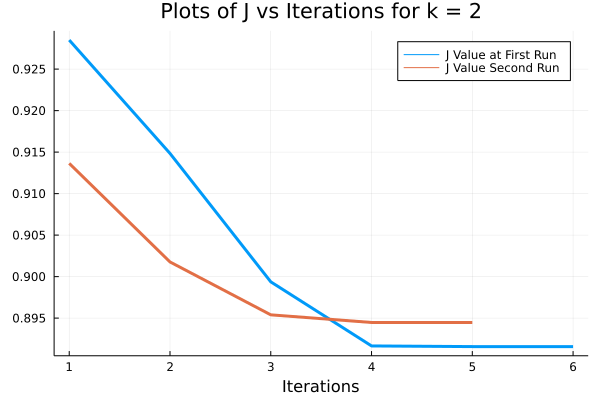

In [58]:
f = plot(j_hist1, label = "J Value at First Run", lw =3)
f = plot!(j_hist2, title = "Plots of J vs Iterations for k = 2", label = "J Value Second Run", lw = 3)
xlabel!("Iterations")
@show f

Let us run kmeans algorithm for k=5 and store the J values in j_hist1 & j_hist2 for the first and second iteration respectively.

In [65]:
k = 5
centroids, labels, j_hist1 = kmeans(article_histograms, k)
println(j_hist1)

[0.889036547290432, 0.8111864827605311, 0.789152363855233, 0.7752475618687125, 0.7738700249121628, 0.7738700249121628]


In [66]:
k = 5
centroids, labels, j_hist2 = kmeans(article_histograms, k)
println(j_hist2)

[0.871721438702109, 0.7945701900524339, 0.7819433241210785, 0.775768534206351, 0.7751986502348754, 0.7745389639439421, 0.7741782877980099, 0.7741782877980099]


f = Plot{Plots.GRBackend() n=2}


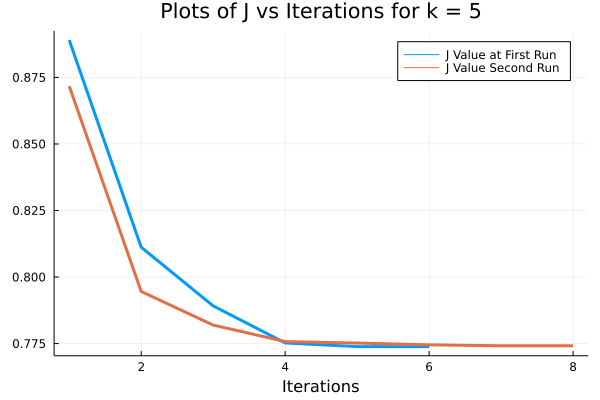

In [67]:
f = plot(j_hist1, label = "J Value at First Run", lw =3)
f = plot!(j_hist2, title = "Plots of J vs Iterations for k = 5", label = "J Value Second Run", lw = 3)
xlabel!("Iterations")
@show f

Let us run kmeans algorithm for k=10 and store the J values in j_hist1 & j_hist2 for the first and second iteration respectively.

In [68]:
k = 10
centroids, labels, j_hist1 = kmeans(article_histograms, k)
println(j_hist1)

[0.8572789995547656, 0.8044402129285347, 0.7485824636416013, 0.7362262159555535, 0.7324331548798203, 0.7319862990400433, 0.7318100532390052, 0.7316222191484233, 0.7316222191484233]


In [69]:
k = 10
centroids, labels, j_hist2 = kmeans(article_histograms, k)
println(j_hist2)

[0.8245236887011456, 0.7475226889549721, 0.7407043109783367, 0.7336839756441246, 0.7330897546238899, 0.7330897546238899]


f = Plot{Plots.GRBackend() n=2}


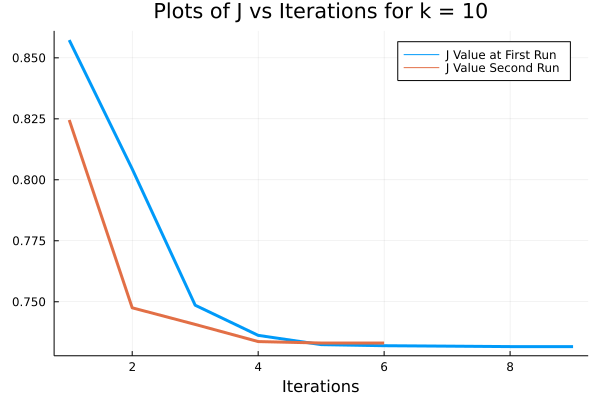

In [71]:
f = plot(j_hist1, label = "J Value at First Run", lw =3)
f = plot!(j_hist2, title = "Plots of J vs Iterations for k = 10", label = "J Value Second Run", lw = 3)
xlabel!("Iterations")
@show f

### Observations:

#### 1) Each time we run the algorithm, we can observe that the number of iterations the algorithm takes to converge is varying. Which means that kmeans is a heuristic algorithm that tries to find the optimal clustering at each instance. 

#### 2) The value of J keeps decreasing at each iteration until it reaches a point where the J value can no longer be decreased.

#### 3) The algorithm terminates when the J value stops changing in any 2 sequential iterations. Also, the number of iterations taken will vary. 

#### 4) The number of iterations and the minimum J value vary at each run, they are dependent on the random initializations of the cluster representatives.

# Topic Discovery - Experiment.   Let's look at the clusters and see if we can identify a pattern.
#### Choose a value of k from experiment #1 and investigate the results by looking at the words and article titles associated with each centroid. 

Let us take k=5 as an example and investigate the results.

In [75]:
k = 5
centroids, labels, j_hist1 = kmeans(article_histograms, k)
println(j_hist1)

[0.8773195003347892, 0.8093458910697177, 0.7881504300167992, 0.7827276458677672, 0.7785431214827014, 0.7772581498114433, 0.7752830193079292, 0.7749825979162405, 0.7749825979162405]


In [76]:
k = 5
centroids, labels, j_hist2 = kmeans(article_histograms, k)
println(j_hist2)

[0.890609804440144, 0.8238075942809581, 0.7999961701864539, 0.7877823539803869, 0.7757393348900964, 0.7746718589552825, 0.7742044838020397, 0.7740575444215277, 0.7739503024379778, 0.7739503024379778]


### *Let us start by looking at the articles in each cluster and their most frequently appearing words.*

In [113]:
article_titles[labels .== 1]

47-element Vector{String}:
 "A Bar at the Folies-Bergère"
 "Alfred Sisley"
 "Armand Guillaumin"
 "Art Institute of Chicago"
 "A Sunday Afternoon on the Island of La Grande Jatte"
 "Bal du moulin de la Galette"
 "Berthe Morisot"
 "Café Guerbois"
 "Camille Pissarro"
 "Claude Monet"
 "Complementary colors"
 "Cubism"
 "Édouard Manet"
 ⋮
 "Neo-impressionism"
 "Paris Street; Rainy Day"
 "Paul Cézanne"
 "Paul Signac"
 "Pierre-Auguste Renoir"
 "Portrait"
 "Post-Impressionism"
 "Salon des Refusés"
 "Still life"
 "The Child's Bath"
 "Wet-on-wet"
 "Woman with a Parasol - Madame Monet and Her Son"

In [120]:
dictionary[sortperm(centroids[1],rev=true)][1:10]

10-element Vector{String}:
 "painting"
 "art"
 "paintings"
 "artists"
 "monet"
 "paris"
 "impressionism"
 "impressionist"
 "manet"
 "salon"

In [114]:
article_titles[labels .== 2]

95-element Vector{String}:
 "Acid rain"
 "Albedo"
 "Anemometer"
 "Anticyclone"
 "Atmosphere"
 "Atmosphere of Earth"
 "Atmospheric pressure"
 "Baroclinity"
 "Barograph"
 "Barometer"
 "Black ice"
 "Ceiling balloon"
 "Ceiling projector"
 ⋮
 "Ultraviolet"
 "Weather balloon"
 "Weather forecasting"
 "Weather front"
 "Weather map"
 "Weather modification"
 "Weather radar"
 "Wind chill"
 "Wind direction"
 "Windsock"
 "Wind speed"
 "Winter storm"

In [121]:
dictionary[sortperm(centroids[2],rev=true)][1:10]

10-element Vector{String}:
 "weather"
 "wind"
 "pressure"
 "air"
 "temperature"
 "ice"
 "water"
 "surface"
 "atmosphere"
 "rain"

In [115]:
article_titles[labels .== 3]

60-element Vector{String}:
 "Amplitude modulation"
 "Amplitude-shift keying"
 "Analog signal"
 "Antenna (radio)"
 "Asynchronous Transfer Mode"
 "Attenuation"
 "Audio power amplifier"
 "Broadcasting"
 "Carrier signal"
 "Channel (communications)"
 "Communications satellite"
 "Data transmission"
 "Digital signal"
 ⋮
 "Smoke signal"
 "Telecommunications network"
 "Telephone"
 "Telephone exchange"
 "Telepresence"
 "Time-division multiplexing"
 "Transmission medium"
 "Transmitter"
 "Voice over IP"
 "W-CDMA (UMTS)"
 "Wide area network"
 "Wireless"

In [122]:
dictionary[sortperm(centroids[3],rev=true)][1:10]

10-element Vector{String}:
 "signal"
 "radio"
 "frequency"
 "telephone"
 "digital"
 "network"
 "transmission"
 "signals"
 "modulation"
 "carrier"

In [116]:
article_titles[labels .== 4]

32-element Vector{String}:
 "Brock (Pokémon)"
 "Bulbasaur"
 "Deoxys"
 "Eevee"
 "Gameplay of Pokémon"
 "Hey You, Pikachu!"
 "Lapras"
 "List of Pokémon characters"
 "Meowth"
 "Mew (Pokémon)"
 "Mewtwo"
 "Misty (Pokémon)"
 "Pikachu"
 ⋮
 "Pokémon HeartGold and SoulSilver"
 "Pokémon Platinum"
 "Pokémon Red and Blue"
 "Pokémon Ruby and Sapphire"
 "Pokémon Trading Card Game"
 "Pokémon universe"
 "Pokémon Yellow"
 "Pokémon 4Ever"
 "Satoshi Tajiri"
 "Team Rocket (anime)"
 "Togepi"
 "Zapdos"

In [123]:
dictionary[sortperm(centroids[4],rev=true)][1:10]

10-element Vector{String}:
 "pokemon"
 "game"
 "games"
 "player"
 "pikachu"
 "nintendo"
 "ash"
 "anime"
 "battle"
 "series"

In [117]:
article_titles[labels .== 5]

66-element Vector{String}:
 "Convention on the Rights of Persons with Disabilities"
 "Food and Agriculture Organization"
 "Headquarters of the United Nations"
 "International Bank for Reconstruction and Development"
 "International Centre for Settlement of Investment Disputes"
 "International Civil Aviation Organization"
 "International Court of Justice"
 "International Development Association"
 "International Finance Corporation"
 "International Fund for Agricultural Development"
 "International Labour Organization"
 "International Maritime Organization"
 "International Monetary Fund"
 ⋮
 "United Nations Trusteeship Council"
 "United Nations University"
 "United Nations Volunteers"
 "Universal Postal Union"
 "UN Women"
 "World Bank Group"
 "World Food Programme"
 "World Health Organization"
 "World Intellectual Property Organization"
 "World Meteorological Organization"
 "World Tourism Organization"
 "World Trade Organization"

In [124]:
dictionary[sortperm(centroids[5],rev=true)][1:10]

10-element Vector{String}:
 "nations"
 "international"
 "member"
 "council"
 "countries"
 "general"
 "convention"
 "assembly"
 "organization"
 "members"

#### Observations:

#### 1) The articles in the first cluster (with label=1) seem to be related to arts, paintings and painters. Painting is the practice of applying paint, pigment, color or other medium to a solid surface  This is apparent from the 3 words that are most commonly appearing in this cluster which are "painting", "art", "paintings". 
#### 2) The articles in the second cluster (with label=2) seem to be related to the study of atosphere (meteorology) and the study of weather phenomena (climatology). The 3 most frequently appearing words in this cluster are "weather", "wind", "pressure".
#### 3) The articles in the third cluster (with label=3) seem to be related to Information Theory and Communication Networks. Information theory is the scientific study of the quantification, storage, and communication of digital information.  The 3 most frequently appearing words in this cluster are "signal", "radio", "frequency".
#### 4) The articles in the fourth cluster (with labels=4) are related to the Japanese anime "Pokemon". Pokémon is a series of video games developed by Game Freak and published by Nintendo and The Pokémon Company under the Pokémon media franchise. These articles cover information about the anime, the video games and movies which are related to Pokemon. The 3 most commonly occurring words in this cluster are "Pokemon", "game", "games". 
#### 5) The articles in the fifth cluster (with labels=5) are related to the international councils and organizations. An international organization is a stable set of norms and rules meant to govern the behavior of states and other actors in the international system. The 3 most commonly occurring words in this cluster are "nations", "international", "member". 